In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.8.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [6]:
class_names = ['T-shurt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal' ,'Shirt', 'Sneaker',
               'Bag','Ankle Boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

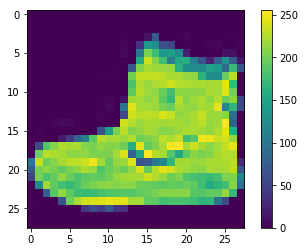

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images /255.0
test_images = test_images /255.0

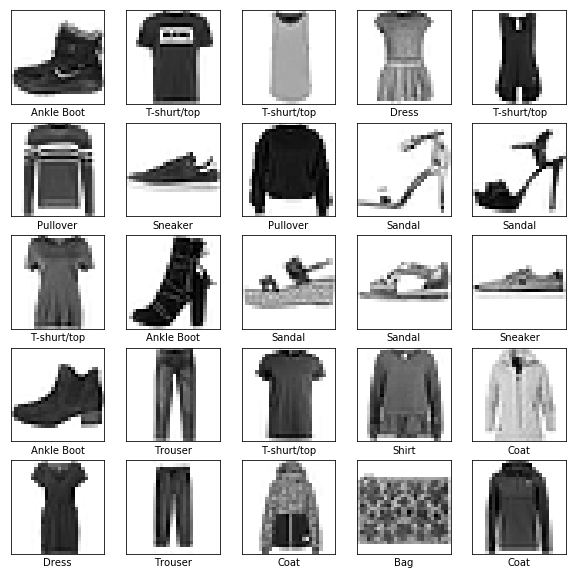

In [15]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()              

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [18]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.4891 - acc: 0.8255
Epoch 2/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.3731 - acc: 0.8650
Epoch 3/5
60000/60000 [==============================] - 6s 93us/step - loss: 0.3358 - acc: 0.8771
Epoch 4/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.3111 - acc: 0.8850
Epoch 5/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.2967 - acc: 0.8913
